In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

## Импортируем данные 

In [19]:
df = pd.read_excel('students_data_ege.xlsx', engine = 'openpyxl')
df = df.drop('Unnamed: 0', axis = 1)
df

,birth,contract,group,retest,ecm1,linal1,matstat,terver,ecm2,ege_summ,linal1_spec,matan1,matan1_spec,dvi,ege_math,ege_foreign,ege_rus,moscow,host
0,2001,0,301,0,98,250,5,97,1,359,0,249,0,70,100,87,96,1,0
1,2001,0,301,0,76,226,3,57,1,0,0,234,0,0,0,0,0,1,1
2,1999,0,301,0,72,229,4,52,1,354,0,239,0,80,88,86,93,1,0
3,2000,0,301,1,91,226,5,78,1,150,0,238,0,0,76,0,73,1,0
4,2000,0,301,1,90,176,5,88,1,0,0,243,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1999,0,312,2,50,110,3,61,1,309,1,38,1,65,76,60,100,1,0
249,2000,0,312,0,66,123,5,57,1,318,1,121,1,60,78,80,91,0,0
250,2000,1,312,5,9,104,3,43,0,275,1,33,1,50,68,77,80,0,0
251,2001,0,312,2,46,133,4,70,0,347,1,127,1,75,100,67,98,0,0


Разобьем фрейм на матрицу признаков и переменную интереса

In [20]:
features = list(df.columns)
features.remove('ecm2')

X = df.loc[:, features].values
y = df.loc[:, 'ecm2'].values

X = StandardScaler().fit_transform(X)

## PCA
### Метод главных компонент

Построим график каменистой осыпи

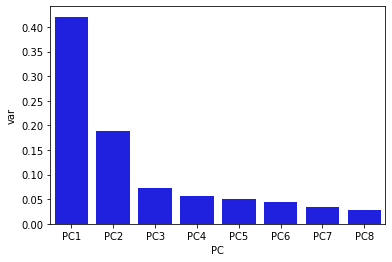

In [4]:
pca = PCA(n_components = 8)
pca.fit_transform(X)

df = pd.DataFrame({'var': pca.explained_variance_ratio_, 
                   'PC': ['PC1','PC2','PC3','PC4', 'PC5', 'PC6', 'PC7', 'PC8']})

sns.barplot(x = 'PC',y = "var", data = df, color = "b");

In [15]:
cor_mat1 = np.corrcoef(X.T)
#eig_vals, eig_vecs = np.linalg.eig(cor_mat1)
#print('Eigenvectors \n%s' %eig_vecs)
#print('\nEigenvalues \n%s' %eig_vals)

#ax = sns.heatmap(cor_mat1, linewidth=0.5)
#plt.show()

#sns.heatmap(cor_mat1, annot = True, vmin = -1, vmax = 1, center = 0, square = True)


In [21]:
pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [22]:
finalDf = pd.concat([principalDf, df[target]], axis = 1)
finalDf

,PC1,PC2,ecm2
0,-3.705145,2.351515,1
1,2.147609,4.689967,1
2,-2.188560,1.914418,1
3,-0.230246,3.840725,1
4,1.855072,4.909687,1
...,...,...,...
248,0.366056,-1.989481,1
249,-0.470168,-0.814075,1
250,2.093482,-2.647019,0
251,-0.776192,-1.522702,0


Построим наблюдения на графике в пространстве главных компонент

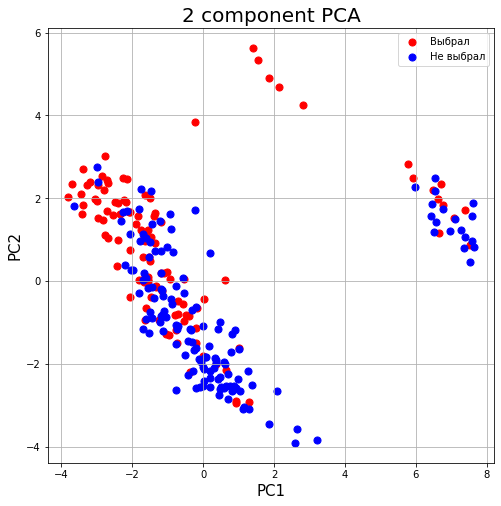

In [23]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)

ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'b']

for target, color in zip(targets, colors):
    
    indicesToKeep = finalDf['ecm2'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)

ax.legend(['Выбрал', 'Не выбрал'])
ax.grid()

Процент объясненной компонентами дисперсии

In [93]:
pca.explained_variance_ratio_

array([0.42097188, 0.18898258])

## Логистическая регрессия